In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nab/README.md
/kaggle/input/nab/realKnownCause/realKnownCause/rogue_agent_key_updown.csv
/kaggle/input/nab/realKnownCause/realKnownCause/ec2_request_latency_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/ambient_temperature_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/nyc_taxi.csv
/kaggle/input/nab/realKnownCause/realKnownCause/rogue_agent_key_hold.csv
/kaggle/input/nab/realKnownCause/realKnownCause/machine_temperature_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/cpu_utilization_asg_misconfiguration.csv
/kaggle/input/nab/realTraffic/realTraffic/TravelTime_387.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_6005.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_t4013.csv
/kaggle/input/nab/realTraffic/realTraffic/occupancy_t4013.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_7578.csv
/kaggle/input/nab/realTraffic/realTraffic/occupancy_6005.csv
/kaggle/input/nab/realTraffic/realTraffic/TravelTime_451.

In [2]:
import pandas as pd

csv = '/kaggle/input/nab/artificialWithAnomaly/artificialWithAnomaly/art_load_balancer_spikes.csv'
csv2 = '/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/elb_request_count_8c0756.csv'

dataset = pd.read_csv(csv2)
dataset.head(4)

,timestamp,value
0,2014-04-10 00:04:00,94.0
1,2014-04-10 00:09:00,56.0
2,2014-04-10 00:14:00,187.0
3,2014-04-10 00:19:00,95.0


<AxesSubplot:xlabel='timestamp'>

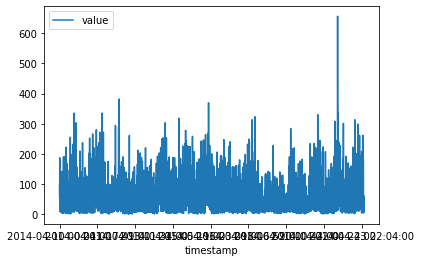

In [3]:
dataset.set_index('timestamp')

## Baseline (Threshold Model)

## Fourier Series
###### https://www.youtube.com/watch?v=dZrShAGqT44

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


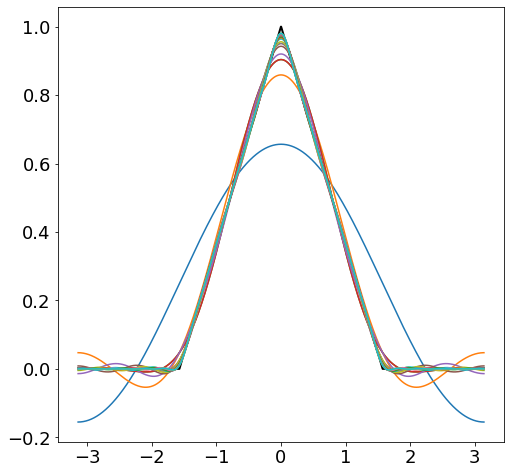

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

dx = 0.001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n) * np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

fig, ax = plt.subplots()
ax.plot(x,f, '-', color='k', LineWidth=2)

name = 'Accent'
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)
A0 = np.sum(f * np.ones_like(x)) * dx

fFS = A0/2

A = np.zeros(20)
B = np.zeros(20)

for k in range(20):
	A[k] = np.sum(f * np.cos(np.pi * (k+1)*x/L)) * dx
	B[k] = np.sum(f * np.sin(np.pi * (k+1)*x/L)) * dx
	fFS = fFS + A[k]* np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
	ax.plot(x,fFS,'-')

## DNN
###### https://www.kaggle.com/usersumit/tensorflow-dnnregressor

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import warnings
warnings.filterwarnings("ignore")


In [ ]:
features = train_df.columns
categorical_features = [feature for feature in features if 'cat' in feature]
continuous_features = [feature for feature in features if 'cont' in feature]
LABEL_COLUMN = 'loss'

In [ ]:
# Converting Data into Tensors
def input_fn(df, training = True):
    # Creates a dictionary mapping from each continuous feature column name (k) to
    # the values of that column stored in a constant Tensor.
    continuous_cols = {k: tf.constant(df[k].values)
                       for k in continuous_features}

    # Creates a dictionary mapping from each categorical feature column name (k)
    # to the values of that column stored in a tf.SparseTensor.
    categorical_cols = {k: tf.SparseTensor(
        indices=[[i, 0] for i in range(df[k].size)],
        values=df[k].values,
        shape=[df[k].size, 1])
        for k in categorical_features}

    # Merges the two dictionaries into one.
    feature_cols = dict(list(continuous_cols.items()) +
                        list(categorical_cols.items()))

    if training:
        # Converts the label column into a constant Tensor.
        label = tf.constant(df[LABEL_COLUMN].values)

        # Returns the feature columns and the label.
        return feature_cols, label
    
    # Returns the feature columns    
    return feature_cols

def train_input_fn():
    return input_fn(train_df)

def eval_input_fn():
    return input_fn(evaluate_df)

def test_input_fn():
    return input_fn(test_df, False)

In [ ]:
engineered_features = []

for continuous_feature in continuous_features:
    engineered_features.append(
        tf.contrib.layers.real_valued_column(continuous_feature))


for categorical_feature in categorical_features:
    sparse_column = tf.contrib.layers.sparse_column_with_hash_bucket(
        categorical_feature, hash_bucket_size=1000)

    engineered_features.append(tf.contrib.layers.embedding_column(sparse_id_column=sparse_column, dimension=16,
                                                                  combiner="sum"))

In [ ]:
regressor = tf.contrib.learn.DNNRegressor(
    feature_columns=engineered_features, hidden_units=[10, 10], model_dir=MODEL_DIR)

In [ ]:
# Training Our Model
wrap = regressor.fit(input_fn=train_input_fn, steps=500)

In [ ]:
# Evaluating Our Model
print('Evaluating ...')
results = regressor.evaluate(input_fn=eval_input_fn, steps=1)
for key in sorted(results):
    print("%s: %s" % (key, results[key]))

In [ ]:
predicted_output = regressor.predict(input_fn=test_input_fn)
print(predicted_output[:10])

## RNN
###### https://www.kdnuggets.com/2017/04/build-recurrent-neural-network-tensorflow.html

In [ ]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.unpack(batchX_placeholder, axis=1)
labels_series = tf.unpack(batchY_placeholder, axis=1)

# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat(1, [current_input, current_state])  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits, labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()

## LSTM
###### https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [5]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'airline-passengers.csv'